In [2]:
from super_gradients.training import models
import cv2
from futstats.annotations.anns import Detection
import matplotlib.pyplot as plt
from super_gradients.training.processing import DetectionCenterPadding, StandardizeImage, NormalizeImage, ImagePermute, ComposeProcessing, DetectionLongestMaxSizeRescale

[2023-11-19 17:32:54] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it
[2023-11-19 17:32:54] WARNING - __init__.py - Failed to import pytorch_quantization


The console stream is logged into /home/fer/sg_logs/console.log


/home/fer/miniconda3/envs/futstats/lib/python3.10/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
[2023-11-19 17:32:56] WARNING - calibrator.py - Failed to import pytorch_quantization
[2023-11-19 17:32:56] WARNING - export.py - Failed to import pytorch_quantization
[2023-11-19 17:32:56] WARNING - selective_quantization_utils.py - Failed to import pytorch_quantization


In [3]:
import torch
print(torch.__version__)
torch.cuda.is_available()

True

In [4]:
%load_ext autoreload
%autoreload 2

2.0.1+cu117


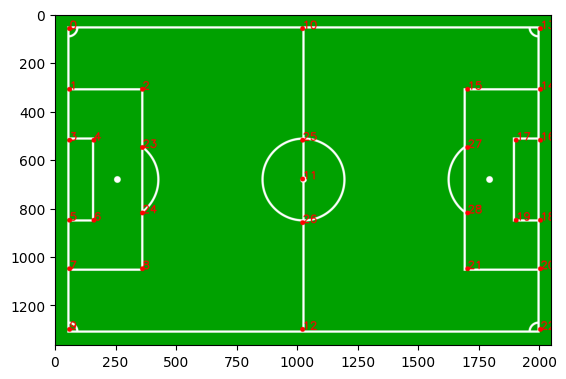

In [5]:
field = cv2.cvtColor(cv2.imread('../images/field_2d.jpg'), cv2.COLOR_BGR2RGB)

# TODO REMODELAR

POINT2POINT2D = {
    "0" : (60, 60),
    "1" : (60,310),
    "2" : (360,310),
    "3" : (60,520),
    "4" : (160,520),
    "5" : (60,850),
    "6" : (160,850),
    "7" : (60,1050),
    "8" : (360,1050),
    "9" : (60,1300),
    "10": (1020,60),
    "11" : (1020,680),
    "12" : (1020,1300),
    "13" : (2000,60),
    "14" : (2000,310),
    "15" : (1700,310),
    "16" : (2000,520),
    "17" : (1900,520),
    "18" : (2000,850),
    "19" : (1900,850),
    "20" : (2000,1050),
    "21" : (1700,1050),
    "22" : (2000,1300),
    "23" : (360,550),
    "24" : (360,820),
    "25" : (1020,520),
    "26" : (1020,860),
    "27" : (1700,550),
    "28" : (1700,820),
}



NUM_CLASES = len(POINT2POINT2D)


check = field.copy()

for id_, coord in POINT2POINT2D.items():
    check = cv2.circle(check, coord, 10, (255, 0, 0), -1)
    check = cv2.putText(check, id_, coord, cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255, 0, 0),3)

plt.imshow(check)

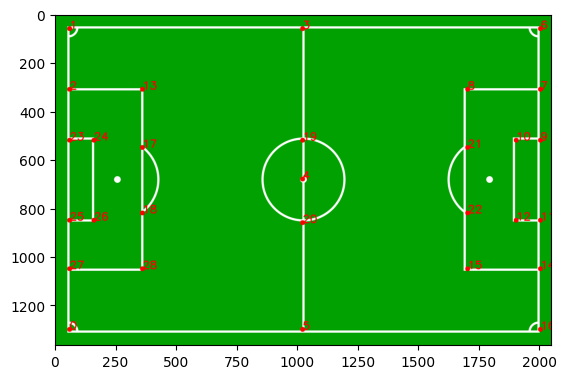

In [6]:

POINT2POINT2D = {
    "0" : (60,1300),
    "1" : (60, 60),
    "2" : (60,310),
    "3": (1020,60),
    "4" : (1020,680),
    "5" : (1020,1300),
    "6" : (2000,60),
    "7" : (2000,310),
    "8" : (1700,310),
    "9" : (2000,520),
    "10" : (1900,520),
    "11" : (2000,850),
    "12" : (1900,850),
    "13" : (360,310),
    "14" : (2000,1050),
    "15" : (1700,1050),
    "16" : (2000,1300),
    "17" : (360,550),
    "18" : (360,820),
    "19" : (1020,520),
    "20" : (1020,860),
    "21" : (1700,550),
    "22" : (1700,820),
    "23" : (60,520),
    "24" : (160,520),
    "25" : (60,850),
    "26" : (160,850),
    "27" : (60,1050),
    "28" : (360,1050),

}


check = field.copy()

for id_, coord in POINT2POINT2D.items():
    check = cv2.circle(check, coord, 10, (255, 0, 0), -1)
    check = cv2.putText(check, id_, coord, cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255, 0, 0),3)

plt.imshow(check)

In [7]:
cktp_path =  "./checkpoints/FIELD_KEYPOINTS_YOLO/ckpt_best.pth"
cktp_path =  "./checkpoints/FIELD_KEYPOINTS_COCO_DATA_1/ckpt_best.pth"
cktp_path = "./checkpoints/ckpt_best_nov.pth"

model = models.get("yolo_nas_s",
                num_classes=NUM_CLASES,
                checkpoint_path=cktp_path)


# model.set_dataset_processing_params(
#     image_processor = ComposeProcessing(
#     [
#         DetectionLongestMaxSizeRescale(output_shape=(636, 636)),
#         DetectionCenterPadding(output_shape=(640, 640), pad_value=114),
#         StandardizeImage(max_value=255.0),
#         ImagePermute(permutation=(2, 0, 1)),
#     ]
# )
# )

[2023-11-19 17:32:58] INFO - checkpoint_utils.py - Successfully loaded model weights from ./checkpoints/ckpt_best_nov.pth EMA checkpoint.


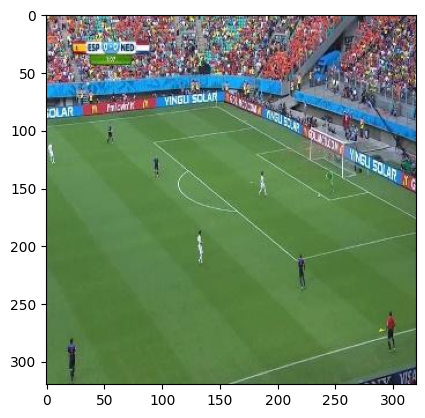

In [8]:
img = cv2.cvtColor(cv2.imread('../images/frame3.png'), cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(cv2.imread(
    "/home/fer/Escritorio/futstatistics/datasets/dataset6_keypoints/dataset6_keypoints_YOLOV5/train/images/3_jpg.rf.8f6bcc82fd3a7c2316e9a4af9c14d1de.jpg"
), cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(cv2.imread(
    "/home/fer/Escritorio/futstatistics/datasets/dataset6_keypoints/dataset6_keypoints_YOLOV5/train/images/102_jpg.rf.a32af053566bea2f5fed38f7e766bb7c.jpg"
), cv2.COLOR_BGR2RGB)
# img = cv2.cvtColor(cv2.imread('../images/frame2.png'), cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [9]:
results = list(model.predict(img, conf=0.35))[0]
detections = Detection.from_yoloNas(pred=results)

[2023-11-19 17:32:58] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


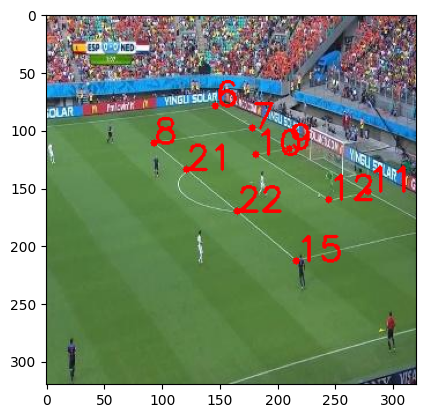

In [10]:

points = img.copy()

for detection in detections:
    x2, y2 = detection.rect.bottom_right.int_xy_tuple
    x1, y1 = detection.rect.top_left.int_xy_tuple
    # get the center of the box
    center = (int((x1 + x2) / 2),int((y1 + y2) / 2))
    points = cv2.circle(points, center, 3, (255, 0, 0), -1)
    points = cv2.putText(points, str(detection.class_id), center, cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0),2)


plt.imshow(points)

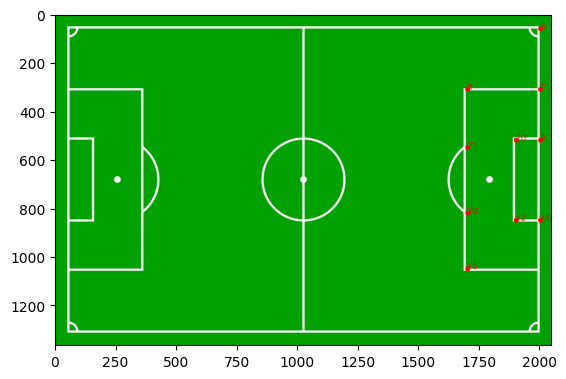

In [11]:
src_points = []
dst_points = []


anns_2d = field.copy()


for detection in detections:
    x2, y2 = detection.rect.bottom_right.int_xy_tuple
    x1, y1 = detection.rect.top_left.int_xy_tuple
    center = (int((x1 + x2) / 2),int((y1 + y2) / 2))
    points_2d = POINT2POINT2D[str(detection.class_id)]
    src_points.append(center)
    dst_points.append(points_2d)
    anns_2d = cv2.circle(anns_2d,points_2d, 10, (255, 0, 0), -1)
    anns_2d = cv2.putText(anns_2d, str(detection.class_id), points_2d, cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0),2)



plt.imshow(anns_2d)

# ball

In [13]:
import numpy as np
M, _ = cv2.findHomography(np.array(src_points), np.array(dst_points), cv2.RANSAC, 5)


In [14]:
M

array([[ 7.83820496e+00,  1.67247506e+01,  2.00412071e+03],
       [ 3.79021658e+00,  3.10074981e+01, -2.93698126e+03],
       [ 1.61824694e-04,  1.51943333e-02,  1.00000000e+00]])

In [19]:
ball = (100,100)

ball_pt = np.array([ball], np.float32).reshape(-1, 1, 2)
ball_pt_2d = cv2.perspectiveTransform(ball_pt, M)
ball_pt_2d = ball_pt_2d.astype(int)

In [17]:
ball_pt

array([[[100., 100.]]], dtype=float32)

In [25]:
src1 = [1021,575]
src2 = [1017,577]
src3 = [1064 ,325]
src4 = [1045,450]
src = np.array([src1,src2,src3,src4])
dst1 = [1020,680]
dst2 = [1020,860]
dst3 = [1020,60]
dst4 = [1020, 520]
dst = np.array([dst1,dst2,dst3,dst4])

In [26]:
M, _ = cv2.findHomography(src, dst, cv2.RANSAC, 5)

In [29]:
print(M)

None
